# Explore here

In [ ]:
#sol: https://github.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/blob/main/solution.ipynb


📝 Instructions
Sociodemographic and health resource data at the county level in the United States (2018-2019)

Sociodemographic and health resource data have been collected by county in the United States, and we want to explore if there is any relationship between health resources and sociodemographic data.

To do this, it is necessary for you to establish a target variable (related to health) to conduct the analysis.

💥Step 1. Data Ingestion

In [5]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [6]:
total_data.info

<bound method DataFrame.info of        fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964

In [7]:
total_data.shape

(3140, 108)

💥Step 2. Data preparation: EDA

2.1 Drop duplicates and null values

In [35]:
duplicates = total_data.duplicated().sum()

print("Duplicates values:", duplicates)

nulls = total_data.isnull().sum()
print("Null values:", nulls)

Duplicates values: 0
Null values: TOT_POP                                                 0
0-9                                                     0
19-Oct                                                  0
20-29                                                   0
30-39                                                   0
40-49                                                   0
50-59                                                   0
60-69                                                   0
70-79                                                   0
80+                                                     0
White-alone pop                                         0
POP_ESTIMATE_2018                                       0
Less than a high school diploma 2014-18                 0
High school diploma only 2014-18                        0
Some college or associate's degree 2014-18              0
Bachelor's degree or higher 2014-18                     0
POVALL_2018                           

Conclusion 👉 There are no null or duplicate values ​​in total_data

Selection of Target Variable for Predictive Modeling 👉 Focusing on Renal Disease (CKD)

Justification: 

After reviewing the dataframe and the data dictionary file at https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/data_dict.csv, we have chosen to predict the occurrence of renal diseases (CKD). We believe that the sample may be sufficiently representative to perform the prediction using linear regression techniques.

Chronic Kidney Disease is a medical condition in which the kidneys do not function properly over an extended period. This disease progresses over time and can lead to a gradual decline in kidney function.

The primary function of the kidneys is to filter the blood, remove waste and excess fluids, and produce urine. When the kidneys are affected by chronic kidney disease, these functions can deteriorate gradually. Chronic kidney disease is classified into stages based on the glomerular filtration rate (GFR), which is a measure of kidney function. The stages range from stage 1 (kidney damage with normal or increased GFR) to stage 5 (very low GFR, indicative of advanced kidney failure).

The causes of chronic kidney disease can be diverse and include conditions such as diabetes, hypertension, autoimmune diseases, chronic kidney infections, and other disorders affecting kidney function.

The diseases and conditions that cause chronic kidney disease include the following:

-Type 1 or Type 2 Diabetes
-High Blood Pressure
-Glomerulonephritis, inflammation of the kidney's filtering units (glomeruli)
-Interstitial Nephritis, inflammation of the kidney tubules and surrounding structures
-Polycystic Kidney Disease or other hereditary kidney diseases
-Prolonged obstruction of the urinary tract, resulting from conditions such as prostate enlargement, kidney stones, and certain types of cancer
-Vesicoureteral Reflux, a condition that causes urine to flow back into the kidneys
-Recurrent Kidney Infection, also known as pyelonephritis

Risk Factors:
Factors that may increase the risk of chronic kidney disease include:

-Diabetes
-High Blood Pressure
-Cardiovascular Disease
-Smoking habit
-Obesity
-Being of Black, Native American, or Asian American descent
-Family history of kidney disease
-Abnormal kidney structure
-Advanced age
-Frequent use of medications that can damage the kidneys

It is important for individuals with risk factors, such as diabetes or hypertension, to undergo regular check-ups to detect chronic kidney disease in its early stages, where there are still opportunities for intervention and slowing its progression. The management of chronic kidney disease may include changes in diet, blood pressure control, glucose control (in cases of diabetes), and, in some cases, specific medical treatment. In advanced stages, chronic kidney disease may require more advanced therapies, such as dialysis or a kidney transplant.

💥3.Quick EDA

In [9]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [10]:
total_data.dtypes

fips                        int64
TOT_POP                     int64
0-9                         int64
0-9 y/o % of total pop    float64
19-Oct                      int64
                           ...   
CKD_prevalence            float64
CKD_Lower 95% CI          float64
CKD_Upper 95% CI          float64
CKD_number                  int64
Urban_rural_code            int64
Length: 108, dtype: object

 3.1 Standardization of numeric variables, creating a new DataFrame called total_data_scal that includes the scaled numeric variables and the original "CKD_number" column.

In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

data_types = total_data.dtypes

# Select numeric columns excluding 'CKD_number'
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "CKD_number"]

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the numeric variables
norm_features = scaler.fit_transform(total_data[numeric_columns])

# Create a new DataFrame with scaled numeric variables
total_data_scal = pd.DataFrame(norm_features, index=total_data.index, columns=numeric_columns)

# Add the 'CKD_number' column to the resulting DataFrame
total_data_scal["CKD_number"] = total_data["CKD_number"]

# Show the first few rows of the resulting DataFrame
total_data_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code,CKD_number
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.138900,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-1.082865,1326
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,0.563986,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,-0.420704,5479
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,-0.219763,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,0.903618,887
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,-0.256918,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-1.745026,595
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,-0.074198,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-1.745026,1507


3.2 Reduce and split the data 👉 See number of features to select (30%)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Select predictor variables and the target variable
X = total_data_scal.drop(columns=["CKD_number"])
y = total_data_scal["CKD_number"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the indices of training and testing sets
train_indices = list(X_train.index)
test_indices = list(X_test.index)

# Determine the number of features to select (30%)
k = int(len(X_train.columns) * 0.3)

# Create the feature selection model
selection_model = SelectKBest(score_func=f_regression, k=k)

# Fit the model to the training set
selection_model.fit(X_train, y_train)

# Get the indices of the selected features
ix = selection_model.get_support()

# Transform the training and testing sets with selected features
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

# Show the first rows of the training set with selected features
X_train_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.212643,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.225814,-0.223516,-0.218609
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.116680,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.115392,-0.110080,-0.131449
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.192263,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.216207,-0.193106,-0.189197
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,0.062458,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007276,-0.007077,-0.047515
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.274818,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.197812,0.265603,0.123040


Feature Selection Using the F-Test and Transforming Training and Test Sets to Include Only Selected Features.

The choice of the percentage of features to retain (in this case, 30%) depends on various factors, and there is no one-size-fits-all rule that applies to all datasets or problems. Selecting the appropriate percentage of features is an important aspect that may vary depending on the context and goals of the analysis. In this case, 30% of features are selected. This decision is practical for large datasets, where significantly reducing the number of features can expedite computations and enhance interpretability. However, in smaller datasets, removing too many features can lead to the loss of important information.

This approach aids in controlling overfitting: Reducing the number of features can help prevent overfitting, especially when there are more features than observations. By selecting only 30% of the features, an attempt is made to strike a balance between the model's complexity and its generalization capability.

Recovering X_test

3.2 Generation of tran and test split in CSV

In [13]:
X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

We´ll concatenate (join) the X_train_sel and X_test_sel data sets along the row axis, thus creating a new data set called total_data. The head() method is used to display the first rows of this resulting data set. In short, you are combining the set of selected features from the training set (X_train_sel) and the test set (X_test_sel) into a single data set called total_data.

3.3 Joining X_train_sel and X_test_sel data sets along the row axis

In [15]:
total_data = pd.concat([X_train_sel, X_test_sel])
total_data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.212643,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,771,-0.223516,-0.218609
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.116680,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,1454,-0.110080,-0.131449
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.192263,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,871,-0.193106,-0.189197
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,0.062458,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,2118,-0.007077,-0.047515
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.274818,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,3490,0.265603,0.123040


3.4 Correlation Matrix (All values)

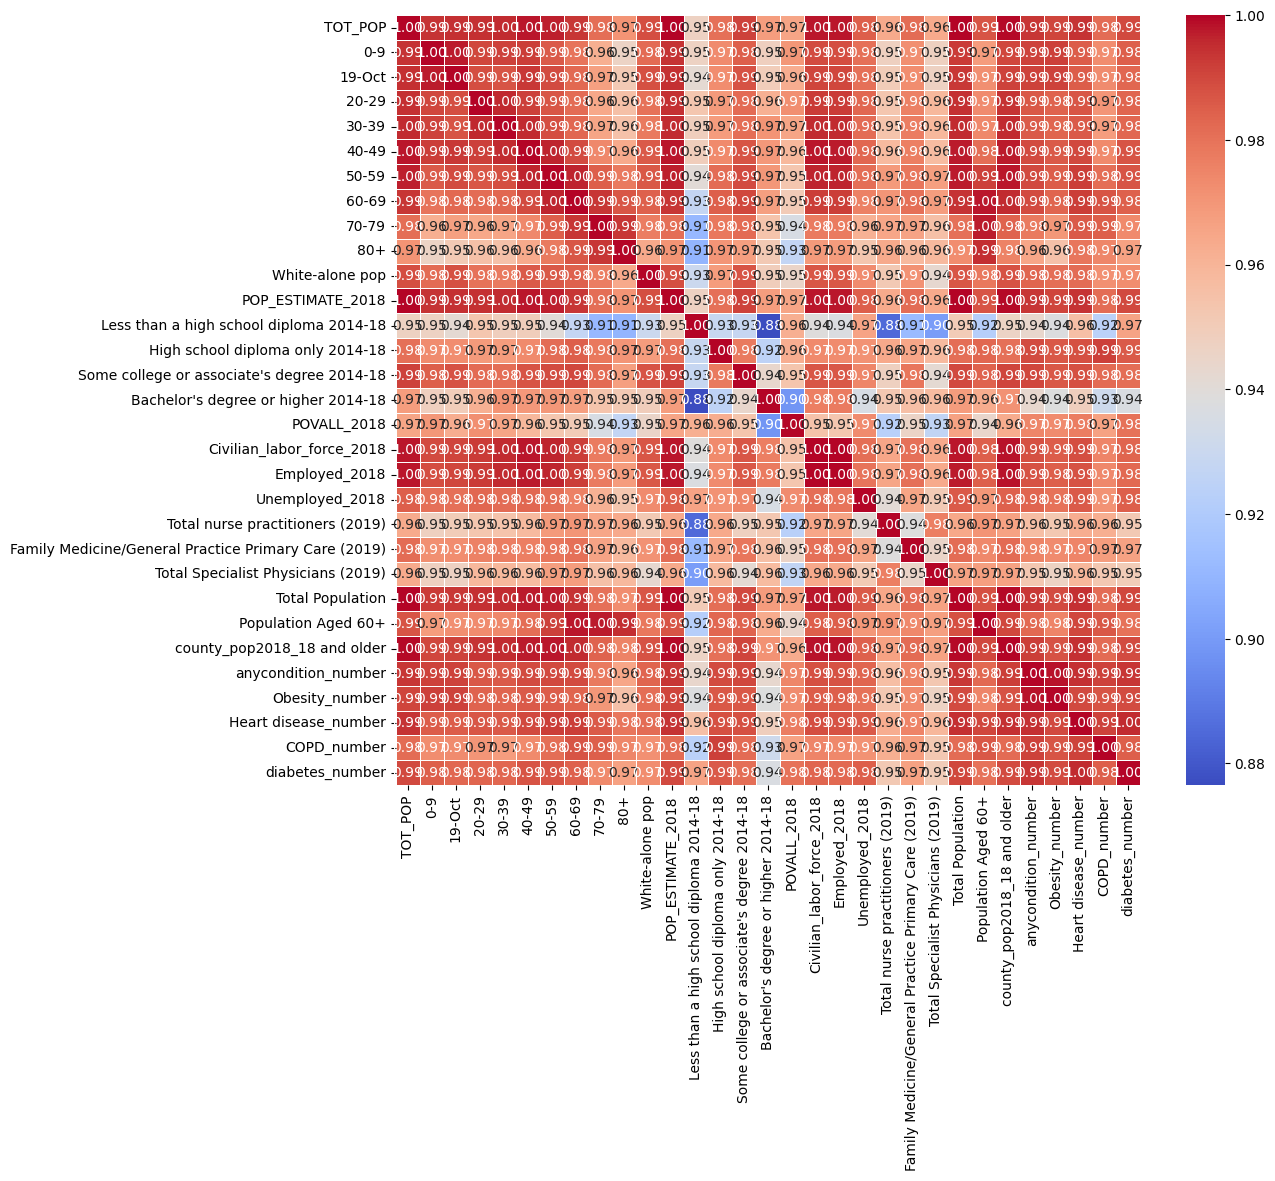

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = total_data.corr()

# Set the size of the figure
plt.figure(figsize=(12, 10))

# Create a heat map with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show Correlation Matrix
plt.show()

3.5 Correlation Matrix (Top 15 values)

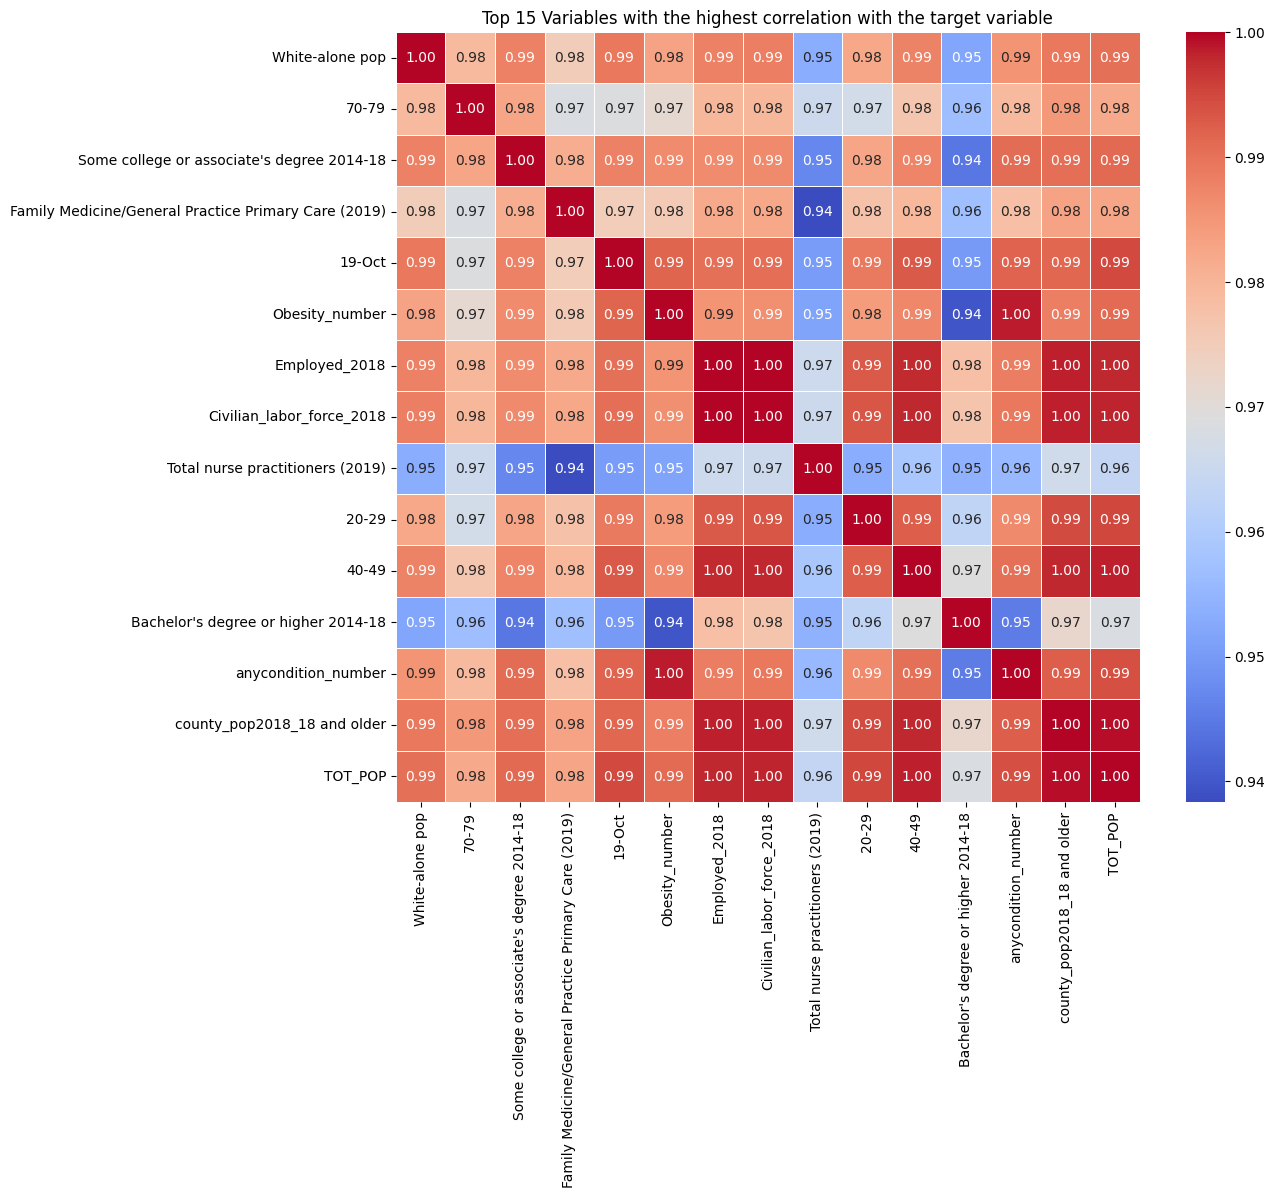

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate the selected features with the target variable to obtain a complete DataFrame
selected_features_with_target = pd.concat([X_train_sel, y_train], axis=1)

# Calculate the correlation matrix
correlation_matrix = selected_features_with_target.corr()

# Obtain the 10 variables with the highest correlation with the target variable
top_correlated_features = correlation_matrix['CKD_number'].sort_values(ascending=False).head(16)[1:]

# Select only the rows and columns corresponding to the 10 variables with the highest correlation
top_corr_matrix = correlation_matrix.loc[top_correlated_features.index, top_correlated_features.index]

# Configure the plot size
plt.figure(figsize=(12, 10))

# Create a heat map with seaborn
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Print plot title
plt.title('Top 15 Variables with the highest correlation with the target variable')
plt.show()


In [17]:
# We show the first rows of the X_test_sel data set
X_test_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number
0,-0.285286,-0.285362,-0.294836,-0.269566,-0.258568,-0.268541,-0.289649,-0.312989,-0.316763,-0.286734,...,-0.303292,-0.285225,-0.284324,-0.308211,-0.283698,-0.302439,-0.302292,293,-0.324038,-0.276290
1,0.496553,0.433072,0.392170,0.544659,0.453677,0.391480,0.499744,0.668639,0.716353,0.476084,...,0.853184,0.424904,0.477184,0.620724,0.517408,0.527360,0.516364,5976,0.443806,0.418504
2,-0.260191,-0.255123,-0.265837,-0.246628,-0.234723,-0.240703,-0.264552,-0.289867,-0.289846,-0.290962,...,-0.277451,-0.261868,-0.257294,-0.287868,-0.259943,-0.249299,-0.259877,594,-0.225107,-0.225970
3,0.039389,0.058341,0.059701,-0.018647,0.003236,0.030594,0.074401,0.091003,0.060721,0.005012,...,0.197267,0.130719,0.036299,0.055281,0.031494,0.035274,0.026108,2639,0.136643,0.003409
4,0.364272,0.281232,0.323623,0.525353,0.295990,0.288317,0.298029,0.461297,0.497760,0.351393,...,0.659217,0.305024,0.336581,0.423969,0.390596,0.271127,0.273318,5054,0.329669,0.256620


💥4.Lineal Regression

4.1 Load data and split into train and test sets

In [ ]:
# For X_train
X_train = train_data.drop(["CKD_number"], axis=1)
y_train = train_data["CKD_number"]

# For X_test
X_test = test_data.drop(["CKD_number"], axis=1)
y_test = test_data["CKD_number"]

Data preparation for ML, dividing the data set into training (X_train and y_train) and test (X_test and y_test) sets, we exclude the 'target' variable "CKD_number"

4.2 Model Training

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

4.3 Obtaining intercept and coefficients

In [19]:
# Obtain intercept and coefficients from the model 
intercept = model.intercept_[0]
coefficients = model.coef_[0]

# Show intercept and coefficients
print(f"Intercept: {intercept}")
print("Coefficients:")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")


Intercepto: -0.45555335855898516
Coeficientes:
fips: 0.06648321716479298
TOT_POP: -0.005793587386458609
0-9: -0.00814551411642322
0-9 y/o % of total pop: 0.1426705787961899
19-Oct: -0.007829748144679698
10-19 y/o % of total pop: 0.16646107100054414
20-29: -0.004286728083062418
20-29 y/o % of total pop: 0.0839634397477754
30-39: -0.004465311661727158
30-39 y/o % of total pop: 0.20766110687070768
40-49: -0.0044762034397120435
40-49 y/o % of total pop: -0.5337310519032832
50-59: -0.005092709765433335
50-59 y/o % of total pop: -0.17255655383512605
60-69: -0.00638805849928046
60-69 y/o % of total pop: 0.0709125025035434
70-79: -0.006653627413157535
70-79 y/o % of total pop: -0.046836945654664286
80+: -0.005147145210006147
80+ y/o % of total pop: -0.20024564935176353
White-alone pop: -0.009998151430154452
% White-alone: 0.004896289863231242
Black-alone pop: 0.0037693112790310912
% Black-alone: 0.012489523990982227
Native American/American Indian-alone pop: -0.005750048914216846
% NA/AI-alone


The intercept and coefficients in a logistic regression model are parameters that describe the relationship between the predictor variables (traits) and the target variable (the one you are trying to predict). Here is a description of its function:

Intercept:

Function: Represents the value of the log-odds function when all characteristics are zero. It is the point where the decision line crosses the vertical axis when all characteristics are null.
Interpretation: In the context of the odds that the response is 1 when all characteristics are zero.
Coefficients (Slopes):

Function: They represent the rate of change in the log-odds for a unit of change in the corresponding predictor variable (characteristic).
Interpretation: In practical terms, a positive coefficient indicates that an increase in the value of the corresponding characteristic is associated with an increase in the log-odds of the response being 1. A negative coefficient indicates the opposite.

In [20]:
After running this code, y_pred will contain the model's predictions for the target variable corresponding to the features in the X_test dataset.

array([  666,  6268,   184,   779,  6268,   157,   445,   453,   446,
         456,   191,   255,   716,   905,  3562,   570, 34032,   266,
         379,   163,   728,    95,   183,   700, 43164,  1118,   994,
         792,   150,   434,   385,  1520,   241,  1296,  1654,   380,
         221,  1029,   537,  1029,   375,  6007,   152,    97,   435,
         434,    50,   523,   354,   452,  2028,   305,  1151,    74,
         537,   746, 17686,   864,   658,   398,  4233,   306,   344,
        2857,  1864,  1636,   152,   727,   114,  4464,  1029,   143,
        2046,   383,   287,  2256,  7706,   553,   156,   278,   521,
         934,  5835,   120,   186,   497, 15030,   270,   435,  3676,
        2111,    58,   875,   779,   635,  1508,   755,   566,  4928,
          34, 16623,  4106,   184,    50,   282,   435,   413,   838,
        3412,  3627,   231,  2878,  5862,  1096,   270,  8431,   430,
         994,  2665,   901,   887,   389,   901,   368,   577,   381,
        2854,   408,

In [ ]:
This code applies the logistic regression model (model) that you previously fitted to the test data (X_test) to make predictions about the target variable
y_pred: Contains the model predictions for the binary target variable based on the features provided in X_test.
These predictions would then be compared with the actual labels in y_test to evaluate the performance of the model, calculate evaluation metrics (such as precision, recall, etc.)

4.4 Obtain MSE an R2

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 3113130.9554140125
R2 Score: 0.8373201416117885


Show deviation of the mean of the data

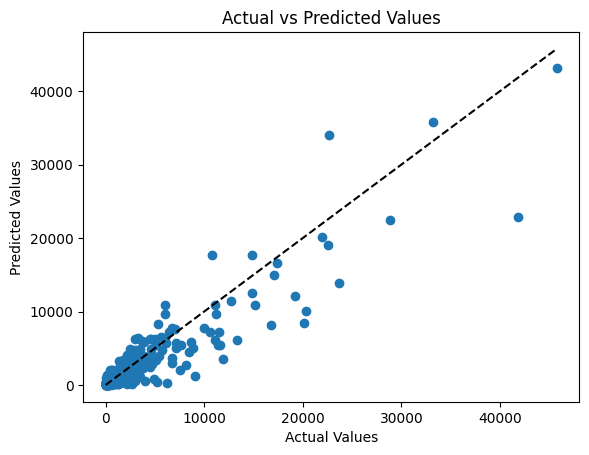

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


The code you provided generates a scatter plot comparing the actual values (y_test) with the predicted values (y_pred). The diagonal line represents the case where actual and predicted values are equal. Points close to this line indicate accurate predictions.

Hiperparameters = Alpha indicates how much the coefficients of the function penalize, a higher value implies a greater reduction in the coefficient.
The higher the coefficient, the less influence on the model variable.

💥 5.Model optimization (applying an alpha of 1.0)

Here, alpha is a hyperparameter that controls the strength of the regularization in Lasso regression. The higher the value of alpha, the stronger the regularization. Regularization is a technique used to prevent overfitting by adding a penalty term to the linear regression equation. In Lasso regression, the penalty term is the absolute value of the coefficients multiplied by alpha.

In [24]:
from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

# Training model
lasso_model.fit(X_train, y_train)

# We evaluate the performance of the model on test data
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [-0.00000000e+00  4.95512565e+03 -5.48558832e+02 -0.00000000e+00
 -6.10310319e-03 -0.00000000e+00  0.00000000e+00  8.64282476e+00
  1.98245109e+02  3.05687500e-02  1.58393568e+03 -9.01189630e+00
  1.36012558e+02  7.13328656e+00  0.00000000e+00  9.61072653e+00
  1.08094423e+03 -1.40817511e+01  8.26111678e+02 -3.09596112e+01
 -1.44561073e+03  2.08711748e+01 -2.01340704e+01 -0.00000000e+00
  8.06908889e+01 -2.52498210e+01 -5.31710020e+02  7.96745706e+00
  1.15212669e+02 -2.19317526e+00 -2.41521419e+02  6.90338044e+00
 -8.08623366e+01 -1.68565482e+01 -0.00000000e+00 -0.00000000e+00
  2.63853113e+00 -0.00000000e+00  1.00082990e+01 -4.35845006e+00
 -0.00000000e+00  7.52160293e+02  0.00000000e+00  0.00000000e+00
 -5.47952895e+02 -1.89290382e+01  0.00000000e+00  3.90975226e-01
 -0.00000000e+00  1.01109128e+03 -6.77403963e+00 -1.70765615e+01
 -0.00000000e+00  0.00000000e+00 -3.84826336e+01  3.53617521e+01
 -8.98545416e+01 -0.00000000e+00 -1.78860297e+02 -2.50135322e+00
 -0.0000000

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.210e+07, tolerance: 1.754e+07
  model = cd_fast.enet_coordinate_descent(


Conclusion 👉 R2 Score = 0.9990903154020885 is very close to 1. This indicates that this model is able to explain a very high proportion of the variance in the dependent variable based on the independent variables. Essentially, it suggests that your model is making highly accurate predictions.

💥6.Saving model

In [25]:
from pickle import dump
# Save the model with .pkl extension
dump(lasso_model, open("../models/lasso_alpha-1.0.pkl", "wb"))

💥7.Loading model (if applicable)

In [ ]:
'''from pickle import load

# Load the Lasso model from the pickle file
loaded_lasso_model = load(open("../models/lasso_alpha-1.0.pkl", "rb"))

# Now, you can use loaded_lasso_model for predictions or further analysis'''